In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0005
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-21 22:46:26,802 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-21 22:46:26,802 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-21 22:46:26,821 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-21 22:46:26,826 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-21 22:46:26,831 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-21 22:46:26,832 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-21 22:46:26,834 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-21 22:46:26,835 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-21 22:46:26,838 - INFO - Class 'fire' has 730 samples.
2024-12-21 22:46:26,842 - INFO - Class 'nofire' has 1157 samples.
2024-12-21 22:46:26,843 - INFO - Computed class weights: {'fire': 2.584931506849315

[INFO] Loading datasets...


2024-12-21 22:46:29,765 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="resnet18",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/efficientnet.pt",
    early_stop_patience=10,
    monitor_metric="val_loss",
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_loss: 0.5156
Epoch [1]: Train Loss: 0.6813, Train Acc: 0.6259 | Val Loss: 0.5156, Val Acc: 0.7711, Val Recall: 0.7480, Val F1: 0.8000


[INFO] Best model saved with val_loss: 0.4815
Epoch [2]: Train Loss: 0.5576, Train Acc: 0.7154 | Val Loss: 0.4815, Val Acc: 0.7910, Val Recall: 0.7439, Val F1: 0.8133


[INFO] Best model saved with val_loss: 0.4243
Epoch [3]: Train Loss: 0.5044, Train Acc: 0.7520 | Val Loss: 0.4243, Val Acc: 0.8010, Val Recall: 0.8780, Val F1: 0.8438


[INFO] No improvement in val_loss. Patience: 1/10
Epoch [4]: Train Loss: 0.4776, Train Acc: 0.7695 | Val Loss: 0.4558, Val Acc: 0.7811, Val Recall: 0.7398, Val F1: 0.8053


[INFO] No improvement in val_loss. Patience: 2/10
Epoch [5]: Train Loss: 0.4630, Train Acc: 0.7848 | Val Loss: 0.4302, Val Acc: 0.8184, Val Recall: 0.8211, Val F1: 0.8470


[INFO] Best model saved with val_loss: 0.4146
Epoch [6]: Train Loss: 0.4438, Train Acc: 0.7949 | Val Loss: 0.4146, Val Acc: 0.8259, Val Recall: 0.8415, Val F1: 0.8554


[INFO] No improvement in val_loss. Patience: 1/10
Epoch [7]: Train Loss: 0.4408, Train Acc: 0.7923 | Val Loss: 0.4363, Val Acc: 0.8085, Val Recall: 0.7724, Val F1: 0.8315


[INFO] No improvement in val_loss. Patience: 2/10
Epoch [8]: Train Loss: 0.4476, Train Acc: 0.7870 | Val Loss: 0.4437, Val Acc: 0.7985, Val Recall: 0.7520, Val F1: 0.8204


[INFO] No improvement in val_loss. Patience: 3/10
Epoch [9]: Train Loss: 0.4402, Train Acc: 0.7928 | Val Loss: 0.4909, Val Acc: 0.7587, Val Recall: 0.6545, Val F1: 0.7685


[INFO] No improvement in val_loss. Patience: 4/10
Epoch [10]: Train Loss: 0.4522, Train Acc: 0.7827 | Val Loss: 0.4533, Val Acc: 0.7736, Val Recall: 0.7073, Val F1: 0.7927


[INFO] Best model saved with val_loss: 0.3986
Epoch [11]: Train Loss: 0.4585, Train Acc: 0.8023 | Val Loss: 0.3986, Val Acc: 0.8483, Val Recall: 0.8780, Val F1: 0.8763


[INFO] No improvement in val_loss. Patience: 1/10
Epoch [12]: Train Loss: 0.4453, Train Acc: 0.7896 | Val Loss: 0.4067, Val Acc: 0.8234, Val Recall: 0.8252, Val F1: 0.8512


[INFO] Best model saved with val_loss: 0.3816
Epoch [13]: Train Loss: 0.4283, Train Acc: 0.8108 | Val Loss: 0.3816, Val Acc: 0.8433, Val Recall: 0.9024, Val F1: 0.8757


[INFO] No improvement in val_loss. Patience: 1/10
Epoch [14]: Train Loss: 0.4462, Train Acc: 0.7928 | Val Loss: 0.4549, Val Acc: 0.7910, Val Recall: 0.7195, Val F1: 0.8082


[INFO] No improvement in val_loss. Patience: 2/10
Epoch [15]: Train Loss: 0.4115, Train Acc: 0.8119 | Val Loss: 0.4028, Val Acc: 0.8234, Val Recall: 0.8252, Val F1: 0.8512


[INFO] No improvement in val_loss. Patience: 3/10
Epoch [16]: Train Loss: 0.4144, Train Acc: 0.8082 | Val Loss: 0.3840, Val Acc: 0.8358, Val Recall: 0.8984, Val F1: 0.8701


[INFO] No improvement in val_loss. Patience: 4/10
Epoch [17]: Train Loss: 0.4661, Train Acc: 0.7795 | Val Loss: 0.4198, Val Acc: 0.8085, Val Recall: 0.7764, Val F1: 0.8322


[INFO] No improvement in val_loss. Patience: 5/10
Epoch [18]: Train Loss: 0.4202, Train Acc: 0.8023 | Val Loss: 0.3883, Val Acc: 0.8333, Val Recall: 0.8659, Val F1: 0.8641


[INFO] No improvement in val_loss. Patience: 6/10
Epoch [19]: Train Loss: 0.3979, Train Acc: 0.8103 | Val Loss: 0.3908, Val Acc: 0.8383, Val Recall: 0.8618, Val F1: 0.8671


[INFO] No improvement in val_loss. Patience: 7/10
Epoch [20]: Train Loss: 0.4388, Train Acc: 0.7944 | Val Loss: 0.3977, Val Acc: 0.8483, Val Recall: 0.8537, Val F1: 0.8732


[INFO] Best model saved with val_loss: 0.3783
Epoch [21]: Train Loss: 0.4336, Train Acc: 0.7917 | Val Loss: 0.3783, Val Acc: 0.8333, Val Recall: 0.9268, Val F1: 0.8719


[INFO] No improvement in val_loss. Patience: 1/10
Epoch [22]: Train Loss: 0.4610, Train Acc: 0.7822 | Val Loss: 0.4886, Val Acc: 0.7736, Val Recall: 0.6789, Val F1: 0.7859


[INFO] No improvement in val_loss. Patience: 2/10
Epoch [23]: Train Loss: 0.4557, Train Acc: 0.7886 | Val Loss: 0.3869, Val Acc: 0.8408, Val Recall: 0.8943, Val F1: 0.8730


[INFO] No improvement in val_loss. Patience: 3/10
Epoch [24]: Train Loss: 0.4301, Train Acc: 0.8013 | Val Loss: 0.4318, Val Acc: 0.7960, Val Recall: 0.7398, Val F1: 0.8161


[INFO] No improvement in val_loss. Patience: 4/10
Epoch [25]: Train Loss: 0.4280, Train Acc: 0.7954 | Val Loss: 0.3911, Val Acc: 0.8284, Val Recall: 0.9106, Val F1: 0.8665


[INFO] No improvement in val_loss. Patience: 5/10
Epoch [26]: Train Loss: 0.4466, Train Acc: 0.7933 | Val Loss: 0.4096, Val Acc: 0.8159, Val Recall: 0.8008, Val F1: 0.8419


[INFO] No improvement in val_loss. Patience: 6/10
Epoch [27]: Train Loss: 0.4595, Train Acc: 0.7875 | Val Loss: 0.3863, Val Acc: 0.8284, Val Recall: 0.8943, Val F1: 0.8644


[INFO] No improvement in val_loss. Patience: 7/10
Epoch [28]: Train Loss: 0.4254, Train Acc: 0.8034 | Val Loss: 0.3904, Val Acc: 0.8308, Val Recall: 0.8577, Val F1: 0.8612


[INFO] No improvement in val_loss. Patience: 8/10
Epoch [29]: Train Loss: 0.4391, Train Acc: 0.7901 | Val Loss: 0.3933, Val Acc: 0.8284, Val Recall: 0.8415, Val F1: 0.8571


[INFO] No improvement in val_loss. Patience: 9/10
Epoch [30]: Train Loss: 0.4372, Train Acc: 0.7949 | Val Loss: 0.3871, Val Acc: 0.8333, Val Recall: 0.8537, Val F1: 0.8624


[INFO] No improvement in val_loss. Patience: 10/10
Epoch [31]: Train Loss: 0.4610, Train Acc: 0.7843 | Val Loss: 0.3905, Val Acc: 0.8458, Val Recall: 0.8659, Val F1: 0.8730
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 31 epochs. Best val_loss: 0.3783

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/logs\model\model_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8070175438596491, 'recall': 0.8679245283018868, 'f1-score': 0.8363636363636363, 'support': 159.0}, 'Fire': {'precision': 0.9121338912133892, 'recall': 0.8685258964143426, 'f1-score': 0.889795918367347, 'support': 251.0}, 'accuracy': 0.8682926829268293, 'macro avg': {'precision': 0.8595757175365191, 'recall': 0.8682252123581147, 'f1-score': 0.8630797773654917, 'support': 410.0}, 'weighted avg': {'precision': 0.8713692589469388, 'recall': 0.8682926829268293, 'f1-score': 0.86907461876103, 'support': 410.0}}, 'confusion_matrix': [[138, 21], [33, 218]], 'roc_auc': 0.9419679771480117, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[INFO] Training plot saved to outputs/efficientnet_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/efficientnet_baseline_confusion_matrix.png
[INFO] All results saved successfully!


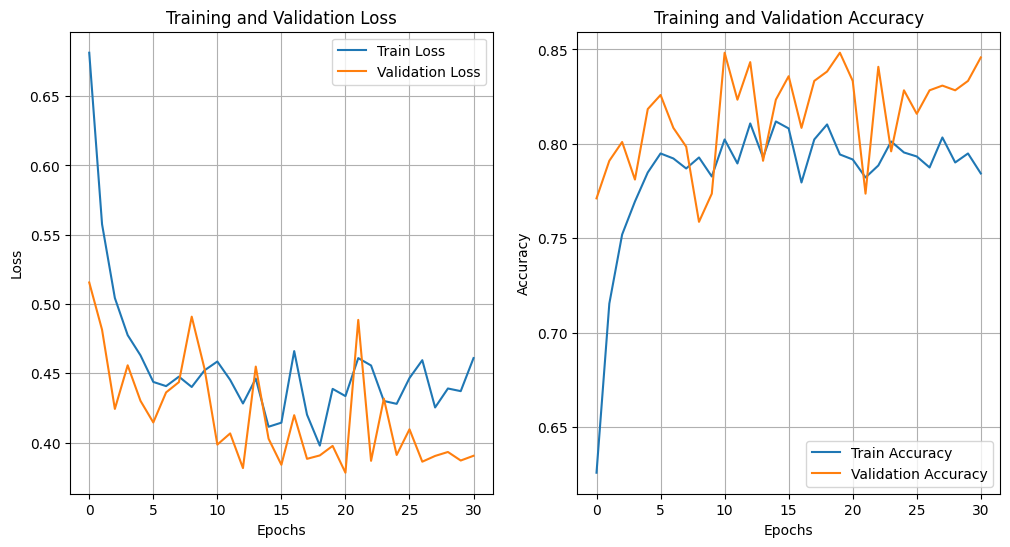

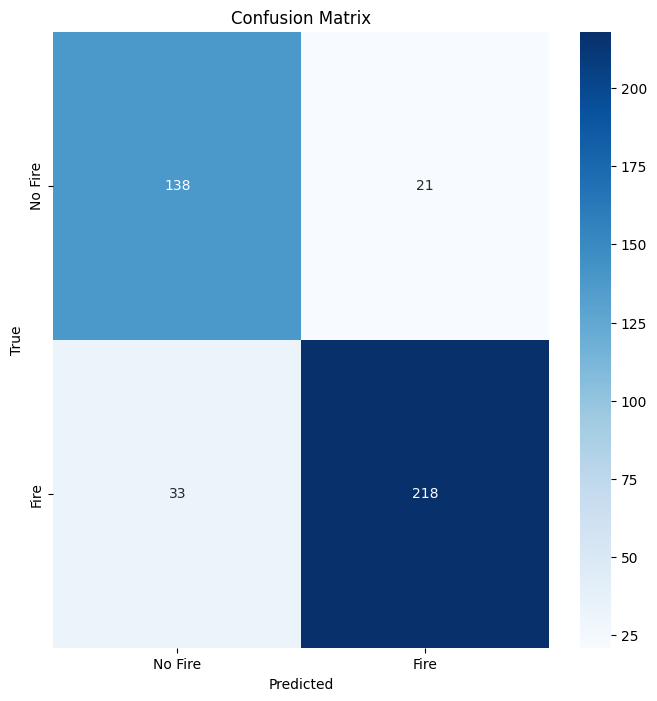

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/efficientnet_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/efficientnet_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/efficientnet_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/efficientnet_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")